<a href="https://colab.research.google.com/github/nallagondu/DATASCIENCE-practice/blob/main/Netflix_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import matplotlib.pyplot as plt



IndentationError: expected an indented block after 'if' statement on line 53 (<ipython-input-13-49ec51a29845>, line 54)

Scraping data from page 1...
Scraping data from page 2...
Scraping data from page 3...
Scraping data from page 4...
Scraping data from page 5...
Scraping data from page 6...
Scraping data from page 7...
Scraping data from page 8...
Scraping data from page 9...
Scraping data from page 10...
Scraping data from page 11...
Scraping data from page 12...
Scraping data from page 13...
Scraping data from page 14...
Scraping data from page 15...
Scraping data from page 16...
Scraping data from page 17...
Scraping data from page 18...
Scraping data from page 19...
Scraping data from page 20...
Scraping data from page 21...
Scraping data from page 22...
Scraping data from page 23...
Scraping data from page 24...
Scraping data from page 25...
Scraping data from page 26...
Scraping data from page 27...
Scraping data from page 28...
Scraping data from page 29...
Scraping data from page 30...
Scraping data from page 31...
Scraping data from page 32...
Scraping data from page 33...
Scraping data from 

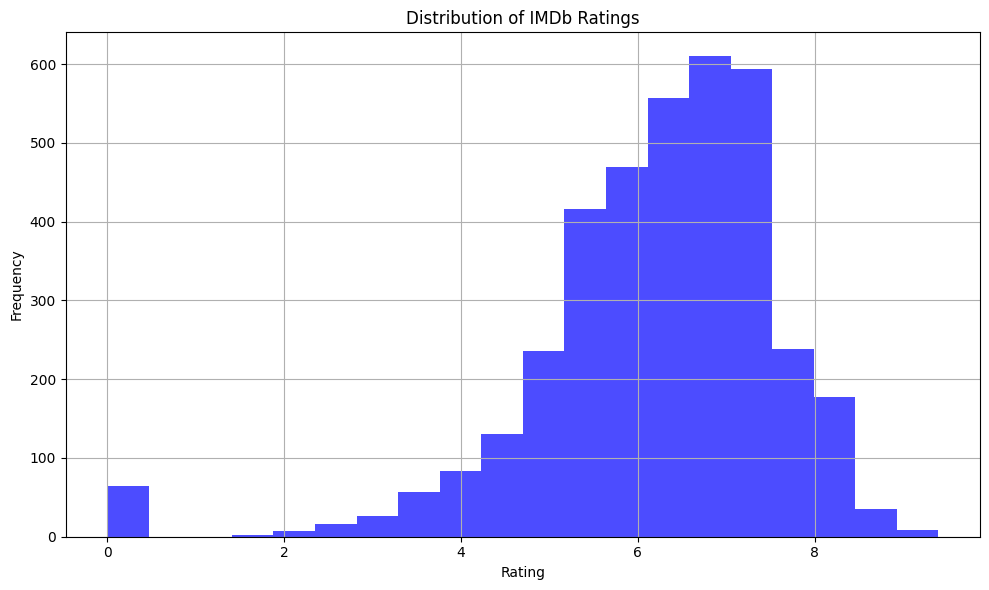

In [14]:
def scrape_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        div_content = soup.find_all('div', class_='lister-item-content')
        data = []
        for div in div_content:
            rating = div.find('span', class_='ipl-rating-star__rating').text.strip() if div.find('span', class_='ipl-rating-star__rating') else None
            name_with_numbering = div.find('h3').text.strip() if div.find('h3') else None
            # Remove numbering from name
            name = name_with_numbering.split('.', 1)[-1].strip()
            data.append({'Rating': rating, 'Name': name})
        return data
    else:
        print(f"Failed to fetch page: {url}")
        return []

def save_to_csv(data, filename):
    with open(filename, 'w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=['Rating', 'Name'])
        writer.writeheader()
        for entry in data:
            writer.writerow(entry)
    print(f"Data saved to {filename}")

def main():
    # Number of pages to scrape
    num_pages = 38

    all_data = []
    # Base URL for the IMDb page
    base_url = 'https://www.imdb.com/list/ls093264464/?sort=list_order,asc&st_dt=&mode=detail&page='

    # Iterate over each page and scrape data
    for page_num in range(1, num_pages + 1):
        # Define the URL for the current page
        url = f"{base_url}{page_num}"

        print(f"Scraping data from page {page_num}...")
        page_data = scrape_data(url)
        all_data.extend(page_data)

    # Save the data to a CSV file
    save_to_csv(all_data, 'imdb_data.csv')

    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv('imdb_data.csv')

    # Drop rows with missing values
    df.dropna(inplace=True)

    # Convert Rating column to numeric
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

    # Plotting
    plt.figure(figsize=(10, 6))

    # Histogram of Ratings
    plt.hist(df['Rating'], bins=20, color='blue', alpha=0.7)
    plt.title('Distribution of IMDb Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()

    plt.show()

if __name__ == "__main__":
    main()


In [20]:
df = pd.read_csv('imdb_data.csv')
df.describe()

,Rating
count,3728.000000
mean,6.199142
std,1.419143
min,0.000000
25%,5.500000
50%,6.400000
75%,7.100000
max,9.400000


In [21]:
df.tail(10)

,Rating,Name
3730,6.6,Watchers 2\n(2011)
3731,5.1,Fabrizio Copano: Solo pienso en mi\n(2017 TV S...
3732,7.4,Krish Trish and Baltiboy: Face Your Fears\n(2017)
3733,8.0,Once in a Lifetime Sessions with Nile Rodgers\...
3734,6.5,Lego House: Home of the Brick\n(2018)
3735,7.6,Anjaan: Special Crimes Unit\n(2018– )
3736,7.4,Krish Trish and Baltiboy: Face Your Fears\n(2017)
3737,7.4,Krish Trish and Baltiboy: Face Your Fears\n(2017)
3738,5.6,The Great Sage Sun Wukong\n(2019)
3739,4.9,A Virgin Among the Living Dead\n(1973)
